<a href="https://colab.research.google.com/github/Ilyass-Dahaoui/CodSoft_Internship/blob/main/TASK5_CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score , f1_score,classification_report

In [2]:
data = pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [41]:
data.shape

(45645, 31)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45646 entries, 0 to 45645
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45646 non-null  int64  
 1   V1      45646 non-null  float64
 2   V2      45646 non-null  float64
 3   V3      45646 non-null  float64
 4   V4      45646 non-null  float64
 5   V5      45646 non-null  float64
 6   V6      45645 non-null  float64
 7   V7      45645 non-null  float64
 8   V8      45645 non-null  float64
 9   V9      45645 non-null  float64
 10  V10     45645 non-null  float64
 11  V11     45645 non-null  float64
 12  V12     45645 non-null  float64
 13  V13     45645 non-null  float64
 14  V14     45645 non-null  float64
 15  V15     45645 non-null  float64
 16  V16     45645 non-null  float64
 17  V17     45645 non-null  float64
 18  V18     45645 non-null  float64
 19  V19     45645 non-null  float64
 20  V20     45645 non-null  float64
 21  V21     45645 non-null  float64
 22

In [42]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,...,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000
mean,27545.115084,-0.237535,0.028939,0.696690,0.191550,-0.248404,0.098588,-0.117937,0.053331,0.157893,...,-0.027098,-0.108684,-0.039060,0.009358,0.136697,0.022305,0.005524,0.004641,90.829574,0.003111
std,12907.723662,1.886568,1.613088,1.530558,1.403918,1.414624,1.308548,1.282818,1.210502,1.222268,...,0.733323,0.636670,0.572037,0.592176,0.437824,0.502716,0.389241,0.338798,240.298594,0.055690
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,19891.000000,-0.985278,-0.543886,0.222729,-0.714486,-0.853440,-0.638480,-0.600071,-0.148358,-0.589301,...,-0.232743,-0.529609,-0.179136,-0.322003,-0.128065,-0.329709,-0.063670,-0.006837,7.580000,0.000000
50%,32447.000000,-0.246193,0.088872,0.801622,0.191927,-0.280576,-0.155353,-0.073143,0.054815,0.038334,...,-0.070241,-0.083448,-0.051304,0.062230,0.175771,-0.067778,0.008425,0.021814,24.990000,0.000000
75%,37571.000000,1.157413,0.739734,1.434864,1.070942,0.287619,0.487645,0.429944,0.324345,0.859738,...,0.105614,0.303459,0.077905,0.401392,0.421857,0.302819,0.084017,0.076209,82.600000,0.000000
max,42437.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


In [43]:
data.isnull().values.any()

False

In [44]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.isnull().values.any()

False

In [45]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

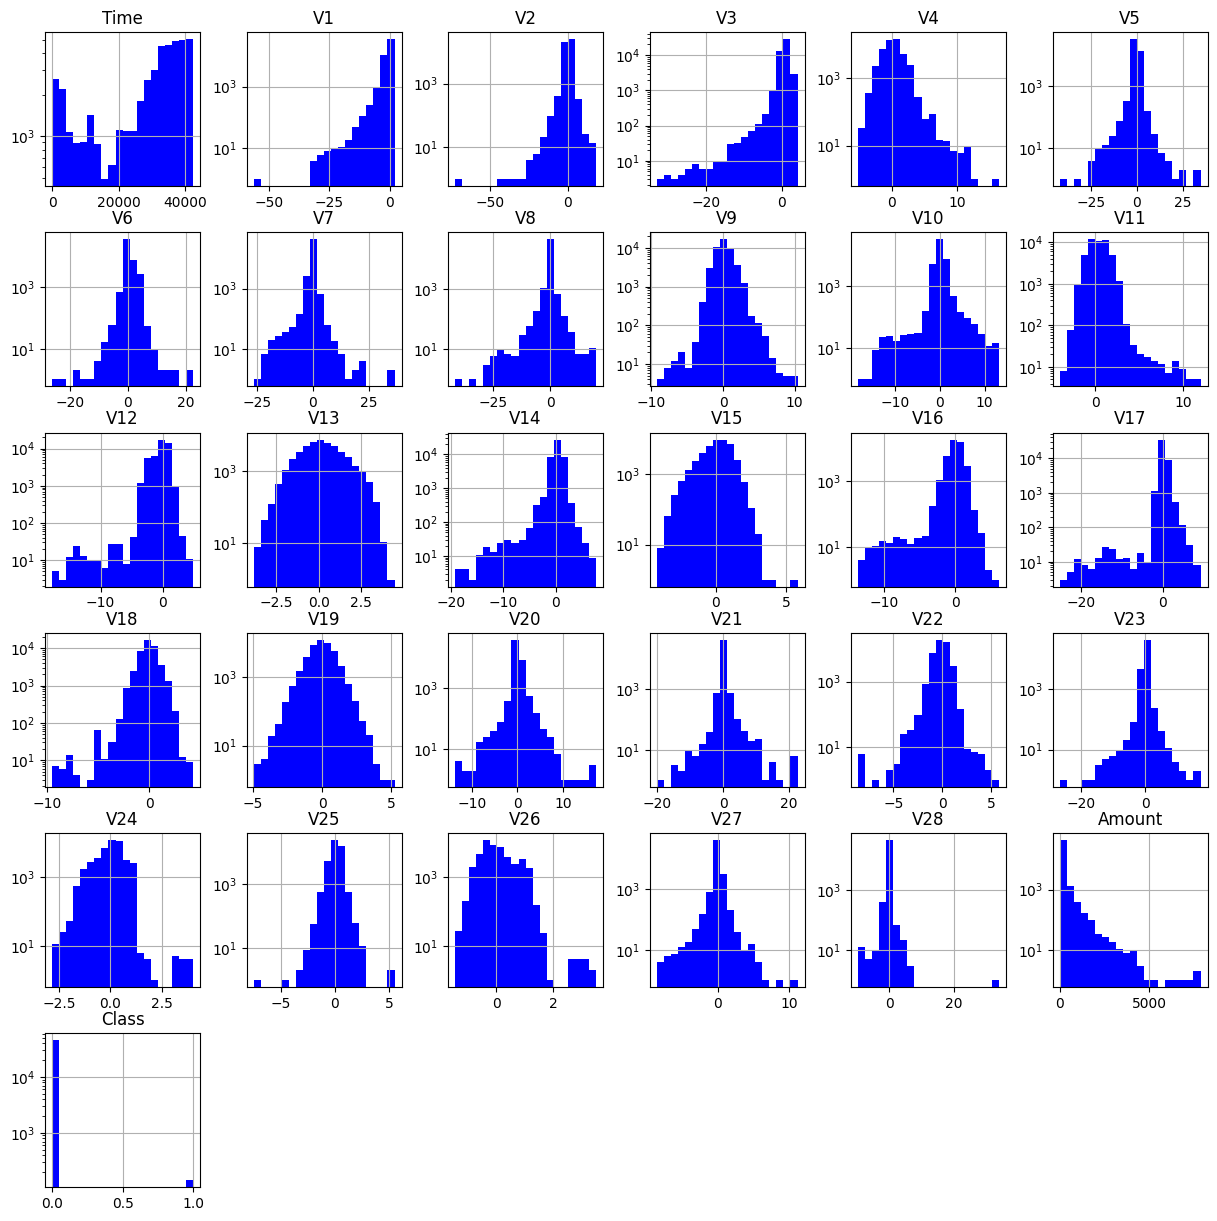

In [10]:
data.hist(figsize=(15, 15), color="blue", histtype='stepfilled', bins=20, log=True)
plt.show()

Text(0, 0.5, 'Mean Transcation Amount')

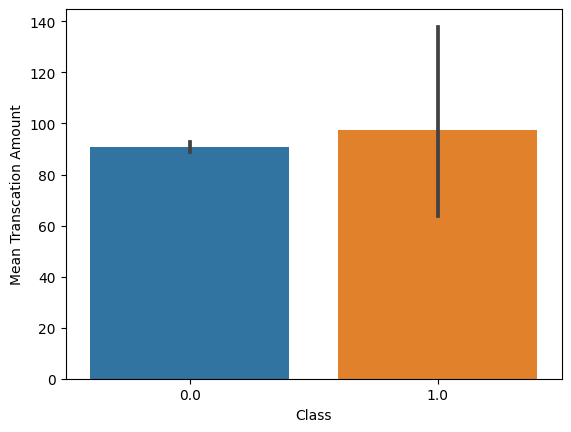

In [76]:
sns.barplot(data=data,x='Class', y='Amount')
plt.ylabel('Mean Transcation Amount')

In [46]:
data['Amount'].describe()

count    45645.000000
mean        90.829574
std        240.298594
min          0.000000
25%          7.580000
50%         24.990000
75%         82.600000
max       7879.420000
Name: Amount, dtype: float64

In [47]:
data['Class'].head

<bound method NDFrame.head of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45640    0.0
45641    0.0
45642    0.0
45643    0.0
45644    0.0
Name: Class, Length: 45645, dtype: float64>

In [48]:
data['Amount'].head

<bound method NDFrame.head of 0        149.62
1          2.69
2        378.66
3        123.50
4         69.99
          ...  
45640      0.76
45641      0.00
45642      7.49
45643      0.89
45644      2.69
Name: Amount, Length: 45645, dtype: float64>

In [49]:
x=data.drop('Class',axis=1)
y=data['Class']


In [50]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,stratify=y, random_state=50)


In [62]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(36516, 30)
(36516,)
(9129, 30)
(9129,)


In [63]:
model=LogisticRegression()

In [64]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle de régression logistique :", accuracy*100 ,"%")


Précision du modèle de régression logistique : 99.70423923759448 %


In [74]:
modelRF = RandomForestClassifier()
modelRF.fit(x_train,y_train)
y_pred = modelRF.predict(x_test)
score = accuracy_score(y_pred, y_test)
print("Précision du modèle de random forest:", accuracy*100 ,"%")

Précision du modèle de random forest: 99.70423923759448 %


In [75]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9101
         1.0       1.00      0.89      0.94        28

    accuracy                           1.00      9129
   macro avg       1.00      0.95      0.97      9129
weighted avg       1.00      1.00      1.00      9129

